In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
review = pd.read_csv('yelp_training_set_review.csv')

# Review Data Set

In [79]:
review.head()

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw


In [80]:
review['text'][1]

'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the ca

In [81]:
review.shape

(229907, 32)

In [82]:
review.columns

Index(['Unnamed: 0', 'business_blank', 'business_categories', 'business_city',
       'business_full_address', 'business_id', 'business_latitude',
       'business_longitude', 'business_name', 'business_neighborhoods',
       'business_open', 'business_review_count', 'business_stars',
       'business_state', 'business_type', 'cool', 'date', 'funny', 'review_id',
       'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool',
       'reviewer_funny', 'reviewer_name', 'reviewer_review_count',
       'reviewer_type', 'reviewer_useful', 'stars', 'text', 'type', 'useful',
       'user_id'],
      dtype='object')

In [83]:
review.isnull().sum()

Unnamed: 0                     0
business_blank                 0
business_categories          777
business_city                  0
business_full_address          0
business_id                    0
business_latitude              0
business_longitude             0
business_name                  0
business_neighborhoods    229907
business_open                  0
business_review_count          0
business_stars                 0
business_state                 0
business_type                  0
cool                           0
date                           0
funny                          0
review_id                      0
reviewer_average_stars         0
reviewer_blank                 0
reviewer_cool                  0
reviewer_funny                 0
reviewer_name              14028
reviewer_review_count          0
reviewer_type                  0
reviewer_useful                0
stars                          0
text                           6
type                           0
useful    

# Business Blank

In [84]:
review['business_blank'].value_counts()

False    229907
Name: business_blank, dtype: int64

This column tells that if in each row has business name it will equal to false but if not it will equal to true, since there are only false value means that all of the row has business name, so I will drop this column.

# Business Neighborhoods

In [85]:
review['business_neighborhoods'].value_counts()

Series([], Name: business_neighborhoods, dtype: int64)

In [86]:
review['business_neighborhoods'].unique()

array([nan])

It looks like all of the row are null value, so I will drop this column.

# Business Type

In [87]:
review['business_type'].value_counts()

business    229907
Name: business_type, dtype: int64

It seem like there are only one type of business which is business, so I will drop this column.

# Reviewer Type

In [88]:
review['reviewer_type'].value_counts()

user    229907
Name: reviewer_type, dtype: int64

# Type

In [89]:
review['type'].value_counts()

review    229907
Name: type, dtype: int64

# Drop unnecessary columns

In [90]:
review = review.drop(columns = ['Unnamed: 0', 'business_full_address','business_blank', 'business_neighborhoods', 'business_type', 'reviewer_type', 'type'])

In [91]:
review.head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state,...,reviewer_blank,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,True,116,4.0,AZ,...,False,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,True,102,4.0,AZ,...,False,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,True,265,4.5,AZ,...,False,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,True,88,4.5,AZ,...,False,36,18,lindsey,31,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,True,5,4.5,AZ,...,False,8,3,Roger,28,32,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw


# Business State

In [92]:
# Since most of data are in Arizona, I will use only data from Arizona.
review['business_state'].value_counts()

AZ    229891
CA         6
SC         5
CO         5
Name: business_state, dtype: int64

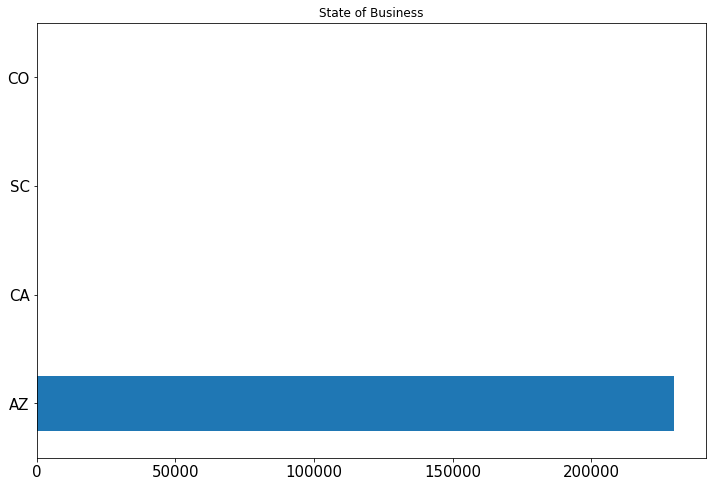

In [93]:
plt.figure(figsize = (12,8))
review['business_state'].value_counts().plot(kind = 'barh')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('State of Business');

In [94]:
review = review[review['business_state'] == 'AZ']

In [95]:
review = review.reset_index()

# Business Categories

In [96]:
review['business_categories'].value_counts()

Mexican; Restaurants                                                                15153
American (New); Restaurants                                                          7987
Pizza; Restaurants                                                                   6527
American (Traditional); Restaurants                                                  5008
Food; Coffee & Tea                                                                   4513
                                                                                    ...  
Active Life; Soccer; Playgrounds; Parks                                                 3
Arts & Crafts; Shopping; Baby Gear & Furniture                                          3
Arts & Entertainment; Psychics & Astrologers                                            3
Dermatologists; Doctors; Hair Removal; Health & Medical; Beauty & Spas                  3
Elementary Schools; Local Services; Child Care & Day Care; Education; Preschools        3
Name: busi

In [97]:
review['business_categories'].isnull().sum()

777

In [98]:
# Only 3 percent missing for business categories columns
# So I will drop them
777/22907

0.033919762518007594

In [99]:
def drop_null(dataframe, column):
    null_index = dataframe[dataframe[column].isnull() == True].index
    dataframe = dataframe.drop(null_index)
    return dataframe

In [100]:
review = drop_null(review, 'business_categories')

In [101]:
review['business_categories'].isnull().sum()

0

In this project we will use only business that are restaurant, so I will remove row that not in restaurant categories.

In [102]:
res_index = review[review['business_categories'].str.contains('Restaurants')].index
review = review.loc[res_index]
review.shape

(158425, 26)

In [103]:
review.head()

,index,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,...,reviewer_blank,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id
0,0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,True,116,4.0,...,False,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,True,102,4.0,...,False,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,True,265,4.5,...,False,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
5,5,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,True,109,3.5,...,False,1121,743,Deborah,654,1584,4,"Quiessence is, simply put, beautiful. Full wi...",3,sqYN3lNgvPbPCTRsMFu27g
6,6,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,True,307,4.0,...,False,1200,1187,Monique,295,1376,5,Drop what you're doing and drive here. After I...,7,wFweIWhv2fREZV_dYkz_1g


In [104]:
review = review.drop(columns = ['index'])

In [105]:
review.shape

(158425, 25)

### Find Categories of Restaurant

In [106]:
cat_dict = {}
for cat in review['business_categories']:
    for sub_cat in cat.split(';'):
        if sub_cat.replace(' ','') not in cat_dict:
            cat_dict[sub_cat.replace(' ','')] = 1
        else:
            cat_dict[sub_cat.replace(' ','')] += 1
cat_dict

{'Breakfast&Brunch': 11890,
 'Restaurants': 158425,
 'Italian': 12610,
 'Pizza': 14423,
 'MiddleEastern': 1162,
 'WineBars': 4106,
 'Bars': 21333,
 'American(New)': 24010,
 'Nightlife': 22523,
 'Mexican': 19953,
 'SushiBars': 7295,
 'Food': 12903,
 'TeaRooms': 239,
 'Japanese': 5933,
 'Sandwiches': 11021,
 'Delis': 3814,
 'Vegetarian': 3519,
 'Pubs': 3933,
 'Irish': 1378,
 'American(Traditional)': 17693,
 'Lounges': 3316,
 'Thai': 4160,
 'Breweries': 2330,
 'Seafood': 4045,
 'Bakeries': 2637,
 'Burgers': 8961,
 'Steakhouses': 5967,
 'Barbeque': 3912,
 'SportsBars': 3748,
 'Coffee&Tea': 2663,
 'EthnicFood': 471,
 'SpecialtyFood': 840,
 'SoulFood': 989,
 'Southern': 1269,
 'Caribbean': 1130,
 'Tapas/SmallPlates': 337,
 'Chinese': 7270,
 'Vietnamese': 3015,
 'Tex-Mex': 2234,
 'Vegan': 1654,
 'French': 1656,
 'British': 1174,
 'LatinAmerican': 1953,
 'DiveBars': 575,
 'Cajun/Creole': 674,
 'Spanish': 272,
 'AsianFusion': 4258,
 'Greek': 2503,
 'Mediterranean': 4628,
 'Hawaiian': 1401,
 'In

In [107]:
business_categories = pd.DataFrame(cat_dict.items(), columns = ['categories', 'count'])
business_categories.sort_values(by = 'count', ascending = False)[:10]

,categories,count
1,Restaurants,158425
7,American(New),24010
8,Nightlife,22523
6,Bars,21333
9,Mexican,19953
19,American(Traditional),17693
3,Pizza,14423
11,Food,12903
2,Italian,12610
0,Breakfast&Brunch,11890


In [108]:
def bar_plot(x, y, data, title):
    plt.figure(figsize = (12,8))
    plots = sns.barplot(x = x, y = y, data= data)
    plt.xticks(rotation = 90, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(title, fontsize = 20)
    
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 8),
                       textcoords='offset points');

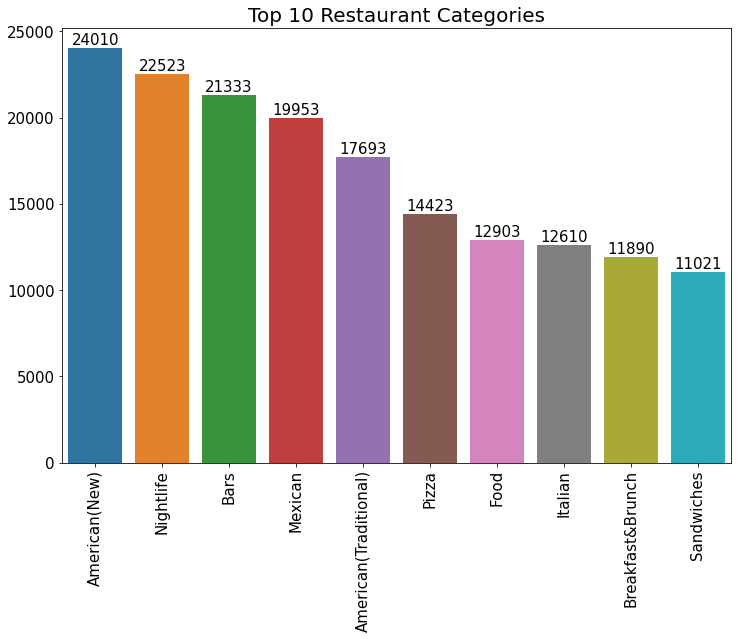

In [109]:
top_10_cat = business_categories.sort_values(by = 'count', ascending = False)[1:11]
bar_plot(x = 'categories', y = 'count', data = top_10_cat, title = 'Top 10 Restaurant Categories')

In [110]:
# Right now index of the data frame is not in the correct order
review = review.reset_index()
review = review.drop(columns = ['index'])

In [111]:
cat_list = []
for cat in review['business_categories']:
    cat_list.append(cat.split(';'))
review['categories'] = cat_list
review.head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,categories
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,True,116,4.0,AZ,...,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q,"[Breakfast & Brunch, Restaurants]"
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,True,102,4.0,AZ,...,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ,"[Italian, Pizza, Restaurants]"
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,True,265,4.5,AZ,...,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg,"[Middle Eastern, Restaurants]"
3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,True,109,3.5,AZ,...,1121,743,Deborah,654,1584,4,"Quiessence is, simply put, beautiful. Full wi...",3,sqYN3lNgvPbPCTRsMFu27g,"[Wine Bars, Bars, American (New), Nightlife..."
4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,True,307,4.0,AZ,...,1200,1187,Monique,295,1376,5,Drop what you're doing and drive here. After I...,7,wFweIWhv2fREZV_dYkz_1g,"[Mexican, Restaurants]"


In [112]:
#for i in range(review.shape[0]):
    #review['categories'][i] = ','.join(cat_list[i])

In [113]:
review['categories']

0                        [Breakfast & Brunch,  Restaurants]
1                           [Italian,  Pizza,  Restaurants]
2                            [Middle Eastern,  Restaurants]
3         [Wine Bars,  Bars,  American (New),  Nightlife...
4                                   [Mexican,  Restaurants]
                                ...                        
158420                       [American (New),  Restaurants]
158421                   [Breakfast & Brunch,  Restaurants]
158422                           [Gastropubs,  Restaurants]
158423    [Pubs,  Bars,  American (Traditional),  Nightl...
158424    [Wine Bars,  Bars,  Pizza,  Nightlife,  Restau...
Name: categories, Length: 158425, dtype: object

# Business City

In [114]:
review['business_city'].isnull().sum()

0

In [115]:
review['business_city']

0            Phoenix
1            Phoenix
2              Tempe
3            Phoenix
4            Phoenix
             ...    
158420    Scottsdale
158421       Phoenix
158422         Tempe
158423         Tempe
158424         Tempe
Name: business_city, Length: 158425, dtype: object

In [116]:
review['business_city'].value_counts()

Phoenix             66518
Scottsdale          36140
Tempe               19526
Chandler            10920
Mesa                 6932
Glendale             5167
Gilbert              4464
Peoria               1758
Avondale              938
Surprise              848
Goodyear              754
Paradise Valley       724
Cave Creek            601
Queen Creek           475
Fountain Hills        262
Casa Grande           244
Anthem                236
Carefree              167
Litchfield Park       166
Buckeye               160
Sun City              147
Wickenburg            139
Tolleson              130
Ahwatukee             128
Apache Junction       124
Maricopa              117
Gila Bend              64
Guadalupe              63
Laveen                 59
North Scottsdale       54
Gold Canyon            52
Florence               40
Sun City West          39
Fountain Hls           36
San Tan Valley         35
El Mirage              33
Tortilla Flat          31
Sun Lakes              27
Fort McDowel

In [117]:
review['business_city'].value_counts(normalize = True)

Phoenix             0.419871
Scottsdale          0.228121
Tempe               0.123251
Chandler            0.068929
Mesa                0.043756
Glendale            0.032615
Gilbert             0.028177
Peoria              0.011097
Avondale            0.005921
Surprise            0.005353
Goodyear            0.004759
Paradise Valley     0.004570
Cave Creek          0.003794
Queen Creek         0.002998
Fountain Hills      0.001654
Casa Grande         0.001540
Anthem              0.001490
Carefree            0.001054
Litchfield Park     0.001048
Buckeye             0.001010
Sun City            0.000928
Wickenburg          0.000877
Tolleson            0.000821
Ahwatukee           0.000808
Apache Junction     0.000783
Maricopa            0.000739
Gila Bend           0.000404
Guadalupe           0.000398
Laveen              0.000372
North Scottsdale    0.000341
Gold Canyon         0.000328
Florence            0.000252
Sun City West       0.000246
Fountain Hls        0.000227
San Tan Valley

Text(0.5, 1.0, 'Top 10 business city')

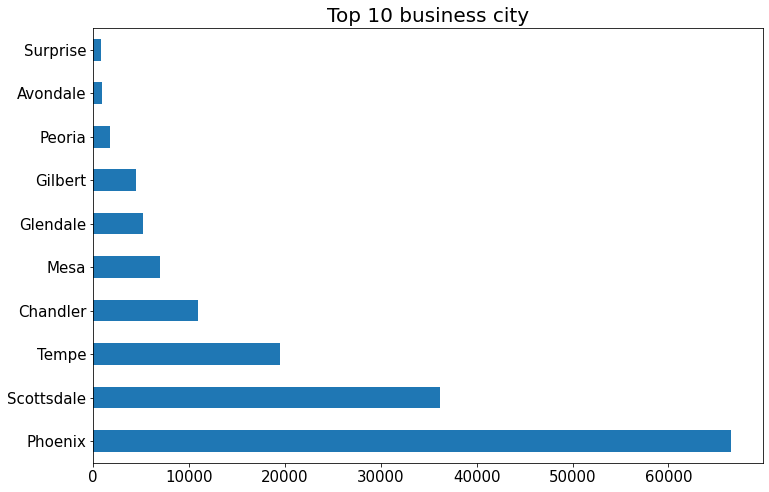

In [118]:
plt.figure(figsize = (12,8))
plots = review['business_city'].value_counts()[:10].plot(kind = 'barh')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Top 10 business city', fontsize = 20)

# Business Name

In [119]:
review['business_name'].value_counts()

Pita Jungle                  1275
Oregano's Pizza Bistro        960
Cornish Pasty Company         907
Pizzeria Bianco               794
Lo-Lo's Chicken & Waffles     794
                             ... 
Juba                            3
Big Dawgs                       3
El Nuevo Taquito                3
El Taco Loco                    3
Gateway Cafe                    3
Name: business_name, Length: 2959, dtype: int64

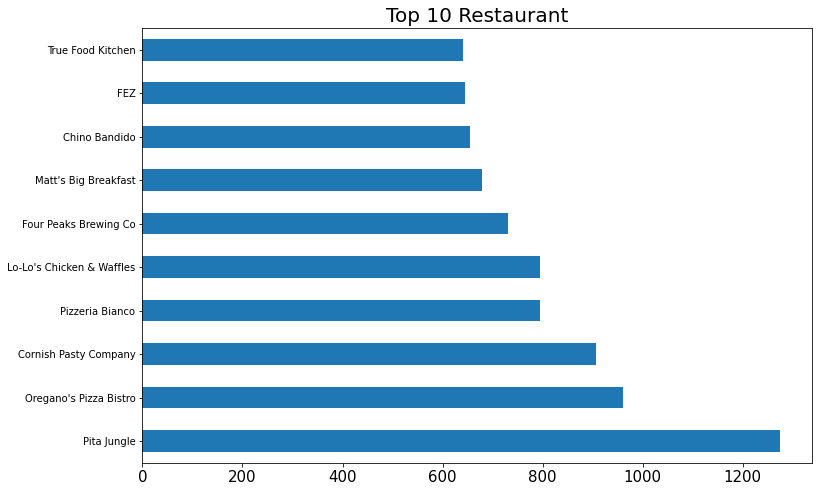

In [120]:
plt.figure(figsize = (12,8))
review['business_name'].value_counts()[:10].plot(kind = 'barh')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)
plt.title('Top 10 Restaurant', fontsize = 20);

# Business Status

In [121]:
review['business_open'].value_counts()

True     143896
False     14529
Name: business_open, dtype: int64

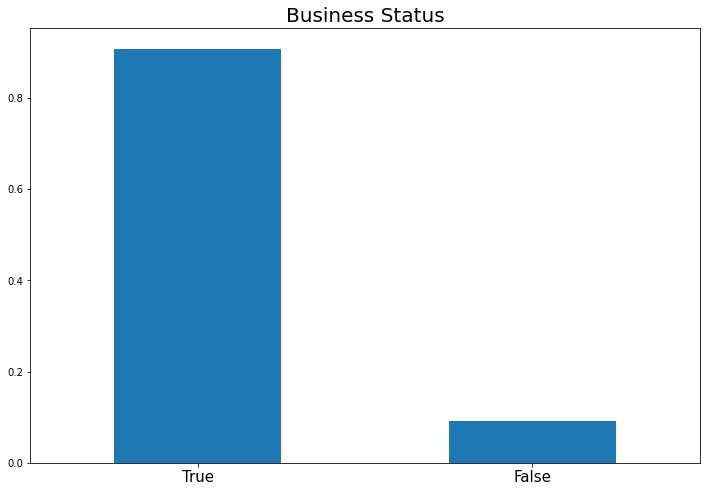

In [122]:
plt.figure(figsize = (12,8))
review['business_open'].value_counts(normalize = True).plot(kind = 'bar')
plt.xticks(rotation = 0, fontsize = 15)
plt.title('Business Status', fontsize = 20);

Business status columns is showing the status of business, if it is true it means that the business status is on goinh while false means that business already closed. Since, I will build a recommendation systems so I will use only business that still on going.

In [123]:
review = review[review['business_open'] == True]

In [124]:
review.shape

(143896, 26)

# Restaurant Review Count

In [125]:
review['business_review_count'].value_counts()

79     1320
36     1273
3      1272
6      1247
31     1219
       ... 
142     142
140     137
134     129
133     129
116     114
Name: business_review_count, Length: 283, dtype: int64

In [126]:
#It's seem like this data got duplicate rows
review[['business_name', 'business_review_count']].sort_values(by = 'business_review_count', ascending = False)

,business_name,business_review_count
118295,Pizzeria Bianco,803
55225,Pizzeria Bianco,803
55238,Pizzeria Bianco,803
15854,Pizzeria Bianco,803
55293,Pizzeria Bianco,803
...,...,...
85443,Domino's Pizza,3
85486,Western Trails Ranch,3
85509,Dairy Queen,3
20545,Burger King,3


In [127]:
# It's duplicated because ther are many people review it
review[review['business_name'] == 'Pizzeria Bianco']

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,categories
143,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,9,11,Becca,28,21,5,"On one of my many visits to see mi amore, he t...",2,qklF6QU-bi4Y4Bt4g6Sv8A,"[Pizza, Restaurants]"
368,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,430,321,Don,297,673,4,"Great Pizza! Great food! Great service! Still,...",6,UuwjD6MZf6Z6QlNphiXRjA,"[Pizza, Restaurants]"
947,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,1526,1201,Joel,215,2305,5,It was 3:45pm and I'm about to jump on a bus t...,6,dQO0tQISZyb9L4d5ASnXyQ,"[Pizza, Restaurants]"
956,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,49,42,bobby,43,103,3,"Sorry, I really just don't get it. I didn't ha...",5,fKYP2YKR5yp_cNHPzBxxKw,"[Pizza, Restaurants]"
1366,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,20,17,Pallavi,36,62,4,Over Hyped ??... Yeah a little but its definit...,1,M3R4oIrJaHDDHbhbzwCLrA,"[Pizza, Restaurants]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157833,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,0,0,NaN,0,0,3,"PB is a good wood fired pizza, but the pizza I...",0,feQpvbp8jGBWMuG5uqbk3Q,"[Pizza, Restaurants]"
157865,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,10,17,Joe,30,55,3,OK...so I moved to town about 8 months ago and...,1,chq_0daEKJwB72KES-LNqg,"[Pizza, Restaurants]"
157870,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,133,34,Formicas,280,237,3,Not sure what the hype is about at this place....,1,qWFYWalunBMpzJvw4WLvgg,"[Pizza, Restaurants]"
158017,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,20,10,Junior,12,25,5,AMAZING FOOD! Yes there is a long wait (2-3 Ho...,3,Rt9fD4mPsz4o3Octv97oMw,"[Pizza, Restaurants]"


In [128]:
review[review['business_name'] == 'Pizzeria Bianco']

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,categories
143,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,9,11,Becca,28,21,5,"On one of my many visits to see mi amore, he t...",2,qklF6QU-bi4Y4Bt4g6Sv8A,"[Pizza, Restaurants]"
368,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,430,321,Don,297,673,4,"Great Pizza! Great food! Great service! Still,...",6,UuwjD6MZf6Z6QlNphiXRjA,"[Pizza, Restaurants]"
947,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,1526,1201,Joel,215,2305,5,It was 3:45pm and I'm about to jump on a bus t...,6,dQO0tQISZyb9L4d5ASnXyQ,"[Pizza, Restaurants]"
956,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,49,42,bobby,43,103,3,"Sorry, I really just don't get it. I didn't ha...",5,fKYP2YKR5yp_cNHPzBxxKw,"[Pizza, Restaurants]"
1366,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,20,17,Pallavi,36,62,4,Over Hyped ??... Yeah a little but its definit...,1,M3R4oIrJaHDDHbhbzwCLrA,"[Pizza, Restaurants]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157833,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,0,0,NaN,0,0,3,"PB is a good wood fired pizza, but the pizza I...",0,feQpvbp8jGBWMuG5uqbk3Q,"[Pizza, Restaurants]"
157865,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,10,17,Joe,30,55,3,OK...so I moved to town about 8 months ago and...,1,chq_0daEKJwB72KES-LNqg,"[Pizza, Restaurants]"
157870,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,133,34,Formicas,280,237,3,Not sure what the hype is about at this place....,1,qWFYWalunBMpzJvw4WLvgg,"[Pizza, Restaurants]"
158017,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,20,10,Junior,12,25,5,AMAZING FOOD! Yes there is a long wait (2-3 Ho...,3,Rt9fD4mPsz4o3Octv97oMw,"[Pizza, Restaurants]"


In [129]:
review['business_name'].nunique()

2339

In [211]:
business_count = review[review['business_stars'] >= 4][['business_name', 'business_review_count']].sort_values(by = 'business_review_count', ascending = False)
business_count

,business_name,business_review_count
72453,Pizzeria Bianco,803
105267,Pizzeria Bianco,803
116111,Pizzeria Bianco,803
2311,Pizzeria Bianco,803
102172,Pizzeria Bianco,803
...,...,...
20321,Dairy Queen,3
37794,D'Lish Cafe,3
124201,Filiberto's,3
7717,Jimmy John's,3


In [212]:
res_list = []
res_ind = []
for index, res in business_count['business_name'].iteritems():
    if res not in res_list:
        res_list.append(res)
        res_ind.append(index)
    else:
        pass
# Top 10 restaurant that got the most review
res_list[:10]

['Pizzeria Bianco',
 'Four Peaks Brewing Co',
 "Matt's Big Breakfast",
 'FEZ',
 'Cibo',
 'Cornish Pasty Company',
 'Postino Arcadia',
 'Gallo Blanco Cafe',
 "Joe's Farm Grill",
 'Delux']

In [213]:
res_ind[:10]

[72453, 51054, 119556, 112613, 76948, 14716, 12323, 39212, 23533, 85960]

In [214]:
top_10_res = {}
top_10_res['name'] = res_list[:10]
res_review_count = []
for ind in res_ind[:10]:
    res_review_count.append(review.loc[ind, 'business_review_count'])
top_10_res['review_count'] = res_review_count
top_10_res

{'name': ['Pizzeria Bianco',
  'Four Peaks Brewing Co',
  "Matt's Big Breakfast",
  'FEZ',
  'Cibo',
  'Cornish Pasty Company',
  'Postino Arcadia',
  'Gallo Blanco Cafe',
  "Joe's Farm Grill",
  'Delux'],
 'review_count': [803, 735, 689, 652, 594, 580, 575, 549, 525, 502]}

In [215]:
top10_res = pd.DataFrame(top_10_res)
top10_res

,name,review_count
0,Pizzeria Bianco,803
1,Four Peaks Brewing Co,735
2,Matt's Big Breakfast,689
3,FEZ,652
4,Cibo,594
5,Cornish Pasty Company,580
6,Postino Arcadia,575
7,Gallo Blanco Cafe,549
8,Joe's Farm Grill,525
9,Delux,502


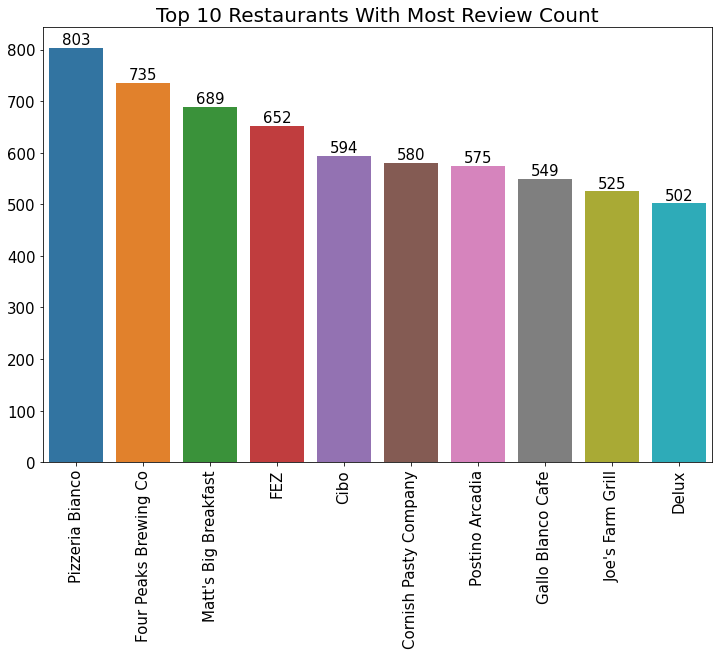

In [217]:
bar_plot(x = 'name', y = 'review_count', data = top_10_res, title = 'Top 10 Restaurants With Most Review Count')

# Business Stars

In [136]:
review['business_stars'].isnull().sum()

0

In [137]:
review['business_stars'].value_counts()

4.0    65327
3.5    42432
4.5    17587
3.0    13505
2.5     3640
2.0      750
5.0      353
1.5      240
1.0       62
Name: business_stars, dtype: int64

In [138]:
review[review['business_stars'] == 5].head(3)

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,categories
402,Ethiopian; Restaurants,Phoenix,1udzLbeQxmLTbOtgyVP0kQ,33.479605,-112.016481,Gojo Ethiopian Restauran,True,8,5.0,AZ,...,1,3,Suzanne,19,22,5,Delish & authentic! The serving was generous (...,2,TmC0qdyUgXCkKK47vwLRPQ,"[Ethiopian, Restaurants]"
772,Restaurants; Pizza; Italian,Glendale,s1IkTuTdWmPunObMizXxSg,33.531073,-112.158860,Venice Pizza,True,4,5.0,AZ,...,10,6,Shadi,11,16,5,"Pizza Venice has, hands down, the best pizza i...",1,ddr63wQ7CdByADPnHNr4-w,"[Restaurants, Pizza, Italian]"
1477,Pizza; Restaurants,Scottsdale,VSPuvNSDUvlTl670lVAkkw,33.583142,-111.927321,Il Bosco Pizza,True,49,5.0,AZ,...,18,11,Shaq,65,53,5,"Yup. It's all true. Great food, super charming...",0,GP-h9colXgkT79BW7aDJeg,"[Pizza, Restaurants]"


In [139]:
review[review['business_name'] == 'Morning Glory Cafe']['business_stars']

0         4.0
3658      4.0
3865      4.0
4716      4.0
5659      4.0
         ... 
153950    4.0
154071    4.0
155065    4.0
156153    4.0
157646    4.0
Name: business_stars, Length: 114, dtype: float64

In [140]:
review[review['business_name'] == 'Morning Glory Cafe']['business_stars'].mean()

4.0

In [141]:
review[review['business_name'] == 'Morning Glory Cafe']['stars']

0         5
3658      2
3865      2
4716      4
5659      5
         ..
153950    4
154071    4
155065    5
156153    4
157646    5
Name: stars, Length: 114, dtype: int64

In [142]:
review[review['business_name'] == 'Morning Glory Cafe']['stars'].mean()

3.8684210526315788

Text(0.5, 1.0, 'Restaurant Rating')

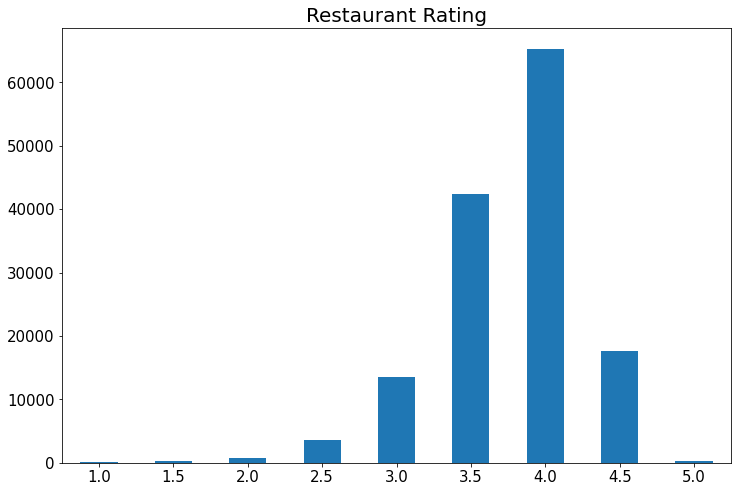

In [143]:
plt.figure(figsize = (12,8))
review['business_stars'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Restaurant Rating', fontsize = 20)

### Restaurant with low stars rating

In [144]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [145]:
def make_wordcloud(text):
    # Aggregate titles
    text = " ".join(title for title in text)
    # Instantiate Word Cloud
    wc = WordCloud(stopwords = stopwords.words('english'),  # exclude stop words
                          max_font_size=72,                 # control biggest font size
                          max_words=120,                    # set how many words will show up
                          background_color="white")         # fix background color
    # 'Fit' Word Cloud to text
    wordcloud = wc.generate(text)
    # Plot
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear");
    plt.axis("off");
    plt.show();

In [146]:
review[review['business_stars'] < 3]['business_name'].value_counts()

RA Sushi Bar Restaurant           144
McDonald's                        143
Cadillac Ranch                    137
Arriba Mexican Grill              119
Jimmy Buffett's Margaritaville    111
                                 ... 
Brickyard Sports Bar and Grill      3
Waterfront Grill                    3
Suki Hana                           3
Burger King #9984                   3
Bucca di Beppo                      3
Name: business_name, Length: 304, dtype: int64

In [147]:
review[review['business_stars'] == 1]['text'][1063]

"The portions are too small, the plasticware just reminds me of Jack In The Box, the serving tray is right from a mall food court, and the menu selection is drastically reduced.  You can't really enjoy conversation or relax at lunch listening to the kitchen scream out order numbers to the customers.  The flavor mixing softdrink machine is fun, but gimmicky.  The food quality and flavor are the same for the most part, but you do leave wanting more...\n\nI won't be returning to this location."

In [148]:
review[review['business_stars'] == 1]['text'][2944]

'I have literally never seen this place open and I live two blocks away.'

In [149]:
review[review['business_stars'] == 1.5]['text'][5184]

'This seems like a decent place to get a drink, if youre so inclined, before going thru security. \n\nThe service was so so, but I also think our waiter was in training. We didnt venture very far into the actual restaurant, just sat at one of the pub tables by the enterance to keep an eye on the security line, so I guess its good for that as well.'

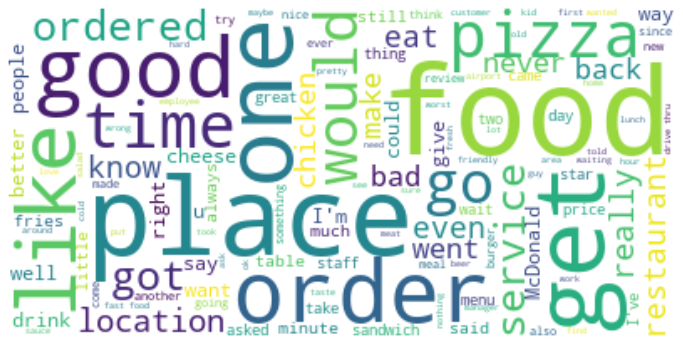

In [150]:
make_wordcloud(review[review['business_stars'] <= 2]['text'])

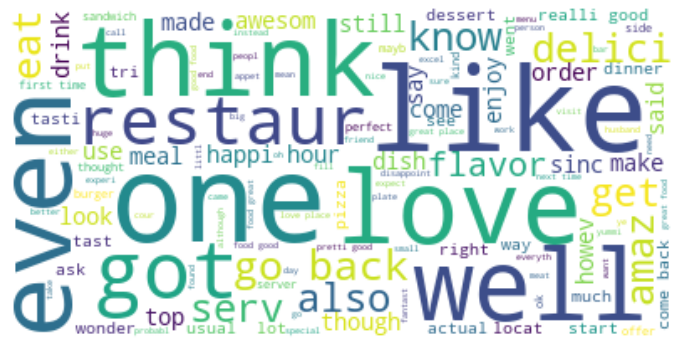

In [218]:
make_wordcloud(review[review['business_stars'] >= 4]['text'])

# Date

In [151]:
review['date'] = pd.to_datetime(review['date'])

In [152]:
review['date']

0        2011-01-26
1        2011-07-27
2        2012-06-14
3        2007-12-13
4        2010-02-12
            ...    
158419   2009-10-07
158420   2010-06-02
158421   2008-02-03
158423   2010-10-11
158424   2011-01-18
Name: date, Length: 143896, dtype: datetime64[ns]

In [153]:
date_df = review.sort_values('date')
date_df.head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,categories
105769,Chinese; Restaurants,Chandler,hrOsdyai-9B91cGjBspHqw,33.336682,-111.858989,Tao Garden,True,38,4.0,AZ,...,99,192,Andy,190,170,3,"Decent Chinese food, they have everything.",0,kJc9YBRwmmZ_PG0uLHuEPQ,"[Chinese, Restaurants]"
39669,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,80,56,Philip,239,129,5,The hands-down best pizza in the world. Chef a...,0,K4FAia2Iy5MVnmBLfS-mCg,"[Pizza, Restaurants]"
32958,Steakhouses; Restaurants,Phoenix,cN6aBxe2mQvrQlzk26LyRQ,33.477215,-112.073635,Durant's,True,281,4.0,AZ,...,104,49,Cyan,129,126,5,This is my favorite steak house of all. They ...,2,6VZNGc2h2Bn-uyuEXgOt5g,"[Steakhouses, Restaurants]"
45716,Chinese; Restaurants,Phoenix,a8yzGF79KcfyRye2R6wt3Q,33.524865,-112.047674,Golden Phoenix Chinese Restaurant,True,40,3.0,AZ,...,80,56,Philip,239,129,4,"Not really the best Chinese food, but the Kung...",2,K4FAia2Iy5MVnmBLfS-mCg,"[Chinese, Restaurants]"
49766,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,36,12,Jason,54,49,5,This pizza is AMAZING. Definitely one of the ...,1,ImsI8Lxr6kXlMtCtMMAmxg,"[Pizza, Restaurants]"


In [154]:
date_df = date_df.set_index('date')
date_df.head(3)

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,categories
date,,,,,,,,,,,,,,,,,,,,,
2005-03-07,Chinese; Restaurants,Chandler,hrOsdyai-9B91cGjBspHqw,33.336682,-111.858989,Tao Garden,True,38,4.0,AZ,...,99,192,Andy,190,170,3,"Decent Chinese food, they have everything.",0,kJc9YBRwmmZ_PG0uLHuEPQ,"[Chinese, Restaurants]"
2005-03-08,Pizza; Restaurants,Phoenix,VVeogjZya58oiTxK7qUjAQ,33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,80,56,Philip,239,129,5,The hands-down best pizza in the world. Chef a...,0,K4FAia2Iy5MVnmBLfS-mCg,"[Pizza, Restaurants]"
2005-03-29,Steakhouses; Restaurants,Phoenix,cN6aBxe2mQvrQlzk26LyRQ,33.477215,-112.073635,Durant's,True,281,4.0,AZ,...,104,49,Cyan,129,126,5,This is my favorite steak house of all. They ...,2,6VZNGc2h2Bn-uyuEXgOt5g,"[Steakhouses, Restaurants]"


In [155]:
date_df.tail(3)

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,categories
date,,,,,,,,,,,,,,,,,,,,,
2013-01-05,Mexican; Restaurants,Scottsdale,iDYzGVIF1TDWdjHNgNjCVw,33.476581,-111.926520,Los Sombreros Mexican Food & Cocktails,True,149,3.5,AZ,...,0,0,NaN,0,0,5,I've heard great things about this place and I...,1,RZI4I0NtZSfkwzY0oNkOEA,"[Mexican, Restaurants]"
2013-01-05,Vietnamese; Restaurants,Phoenix,yVQiGdxmnrkJDyQXv2maNA,33.509711,-112.096227,Pho Thanh,True,184,4.0,AZ,...,1,1,Jovi,3,2,3,Pretty good Pho. Atmosphere was nice reminded ...,2,6nMptzdvDBSWDg1vKJhXjA,"[Vietnamese, Restaurants]"
2013-01-05,Restaurants; American (New); Karaoke; Nightlife,Scottsdale,z6vO1HR8L2iW4avr610XKw,33.494295,-111.924219,The Grapevine,True,89,3.0,AZ,...,0,0,Sean,2,0,1,Dive bar at Scottsdale prices; be prepared to ...,0,138KuJzLIanRis8sGaETzw,"[Restaurants, American (New), Karaoke, Nigh..."


# Reviewer Blank

In [156]:
review['reviewer_blank'].value_counts()

False    135587
True       8309
Name: reviewer_blank, dtype: int64

In [157]:
review[review['reviewer_blank'] == False].head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,categories
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,True,116,4.0,AZ,...,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q,"[Breakfast & Brunch, Restaurants]"
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,True,102,4.0,AZ,...,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ,"[Italian, Pizza, Restaurants]"
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,True,265,4.5,AZ,...,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg,"[Middle Eastern, Restaurants]"
3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,True,109,3.5,AZ,...,1121,743,Deborah,654,1584,4,"Quiessence is, simply put, beautiful. Full wi...",3,sqYN3lNgvPbPCTRsMFu27g,"[Wine Bars, Bars, American (New), Nightlife..."
4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,True,307,4.0,AZ,...,1200,1187,Monique,295,1376,5,Drop what you're doing and drive here. After I...,7,wFweIWhv2fREZV_dYkz_1g,"[Mexican, Restaurants]"


In [158]:
# Seems like for reviewer blank = True is because there is no reviewer name
review[review['reviewer_blank'] == True].head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id,categories
45,Wine Bars; Bars; Restaurants; Nightlife; Tapas...,Scottsdale,P5uC-zfGG6yqoQDUyqyAvg,33.499511,-111.927221,Kazimierz World Wine Bar,True,245,4.0,AZ,...,0,0,NaN,0,0,4,It is romantic here even if you are with just ...,2,nM3vfxr6fcnN_nXdzwbVCw,"[Wine Bars, Bars, Restaurants, Nightlife, ..."
60,American (Traditional); Steakhouses; Restaurants,Phoenix,5GpvSL1tlAjpgdJKZ5eLpg,33.467342,-112.220954,Texas Roadhouse,True,38,4.0,AZ,...,0,0,NaN,0,0,4,"Great place to have a meal with family, can be...",0,P-9g9-6OriX0ElKpZknUKA,"[American (Traditional), Steakhouses, Restau..."
61,Steakhouses; Restaurants,Scottsdale,O-Xa9GCFWI65YiBD5Jw_hA,33.502010,-111.931360,Mastro's City Hall Steakhouse,True,276,4.5,AZ,...,0,0,NaN,0,0,5,Figured it is time to write a review after goi...,1,qT17WVkJi0RvQ4nNPN6NDw,"[Steakhouses, Restaurants]"
63,Food; Coffee & Tea; Breakfast & Brunch; Restau...,Scottsdale,Hgbxen9iKGL4AH6kKgC8YQ,33.498289,-111.927549,Cartel Coffee Lab,True,79,4.5,AZ,...,0,0,NaN,0,0,5,So very Portlandia in its hipsterness and deco...,0,cwm_3br1CTH8IO8ZwWzFLg,"[Food, Coffee & Tea, Breakfast & Brunch, Re..."
71,Barbeque; Restaurants,Scottsdale,WaO_hAunQrZ--vI308rHQA,33.493931,-111.925627,Big Earl's BBQ,True,98,3.5,AZ,...,0,0,NaN,0,0,3,Great food and awesome service! Even better th...,0,qT17WVkJi0RvQ4nNPN6NDw,"[Barbeque, Restaurants]"


In [159]:
review[review['reviewer_blank'] == True]['reviewer_name'].unique()

array([nan], dtype=object)

In [160]:
# But there is not appear when we use isnull method
review['reviewer_blank'].isnull().sum()

0

In [161]:
review.shape

(143896, 26)

In [162]:
review['reviewer_blank'].value_counts()

False    135587
True       8309
Name: reviewer_blank, dtype: int64

In [163]:
# There are around 6% of the data, so I decided to drop it
review['reviewer_blank'].value_counts(normalize = True)

False    0.942257
True     0.057743
Name: reviewer_blank, dtype: float64

In [164]:
ms_ind = review[review['reviewer_blank'] == True].index
review = review.drop(ms_ind)

In [165]:
review['reviewer_blank'].value_counts()

False    135587
Name: reviewer_blank, dtype: int64

In [166]:
review.shape

(135587, 26)

In [167]:
review.columns

Index(['business_categories', 'business_city', 'business_id',
       'business_latitude', 'business_longitude', 'business_name',
       'business_open', 'business_review_count', 'business_stars',
       'business_state', 'cool', 'date', 'funny', 'review_id',
       'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool',
       'reviewer_funny', 'reviewer_name', 'reviewer_review_count',
       'reviewer_useful', 'stars', 'text', 'useful', 'user_id', 'categories'],
      dtype='object')

# Reviewer Cool

In [168]:
reviewer_cool = review[['reviewer_name', 'reviewer_cool']].sort_values(by = 'reviewer_cool', ascending = False)
reviewer_cool[:10]

,reviewer_name,reviewer_cool
118441,Stephy,22410
148034,Stephy,22410
20731,Stephy,22410
507,Connie,22336
142737,Connie,22336
118793,Connie,22336
157432,Connie,22336
52266,Connie,22336
59214,Colleen,18806
104776,Colleen,18806


In [169]:
def get_top_10(dataframe , column1, column2):
    # Create new dataframe
    new_df = dataframe[[column1,  column2]].sort_values(by = column2, ascending = False)
    
    # Get top 10 name and index
    name_list = []
    ind_list = []
    for index, name in new_df[column1].iteritems():
        if name not in name_list:
            name_list.append(name)
            ind_list.append(index)
    
    # Get top 10 column2 value and text
    cool_list = []
    text_list = []
    for index in ind_list[:10]:
        cool_list.append(dataframe.loc[index, column2])
        text_list.append(dataframe.loc[index, 'text'])
    
    # Create Dataframe
    new_df = pd.DataFrame(name_list[:10], columns = ['reviewer_name'])
    new_df[column2] = cool_list
    new_df['text'] = text_list
    return new_df

In [170]:
cool_df = get_top_10(review, 'reviewer_name', 'reviewer_cool')
cool_df.head()

,reviewer_name,reviewer_cool,text
0,Stephy,22410,"""A steak so tender you can cut it with a butte..."
1,Connie,22336,Go Go here for happy hour! From 4-7pm you can ...
2,Colleen,18806,"Gabi K and I happen to be ""ladies who lunch.""\..."
3,ruggy,18681,"From what I've heard, The Vig is quite the hot..."
4,Anthony,18630,***Chase Field's main concession stand Double ...


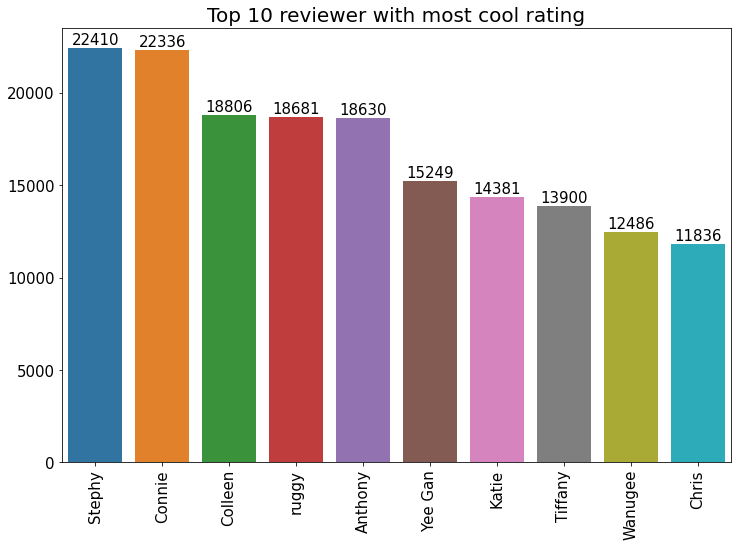

In [171]:
bar_plot(x = 'reviewer_name', y = 'reviewer_cool', data = cool_df, title = 'Top 10 reviewer with most cool rating')

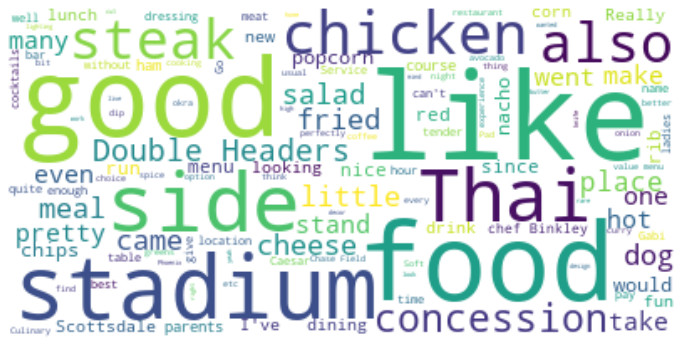

In [172]:
make_wordcloud(cool_df['text'])

# Reviewer Funny

In [173]:
funny_df = get_top_10(review, 'reviewer_name', 'reviewer_funny')
funny_df.head()

,reviewer_name,reviewer_funny,text
0,Stephy,24519,"""A steak so tender you can cut it with a butte..."
1,ruggy,20310,"From what I've heard, The Vig is quite the hot..."
2,Colleen,17534,Gabi always takes me to the best places in Ari...
3,Connie,15730,Go Go here for happy hour! From 4-7pm you can ...
4,Anthony,15370,"***Cracker Barrel is a countrified Denny's, bu..."


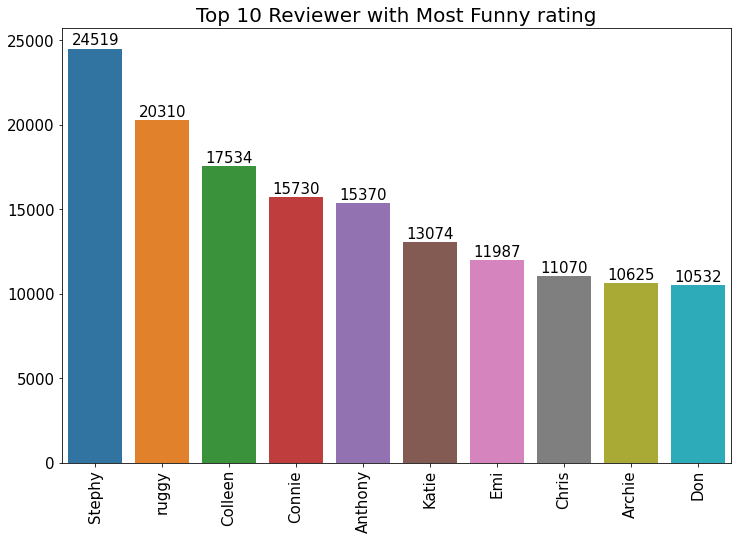

In [174]:
bar_plot(x = 'reviewer_name', y = 'reviewer_funny', data = funny_df, title = 'Top 10 Reviewer with Most Funny rating')

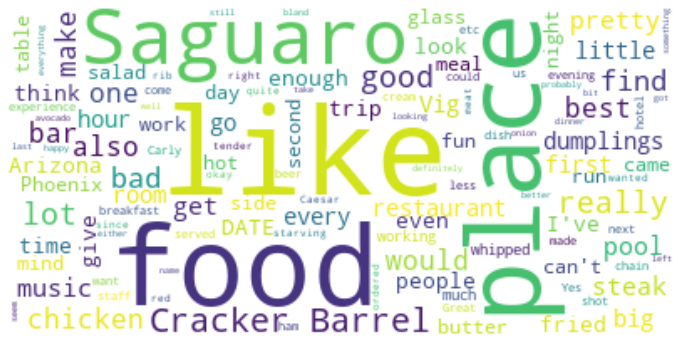

In [175]:
make_wordcloud(funny_df['text'])

# Reviewer Useful

In [176]:
useful_df = get_top_10(review, 'reviewer_name', 'reviewer_useful')
useful_df.head()

,reviewer_name,reviewer_useful,text
0,Colleen,24293,The dynamic duo (Gabi K and Jared M) scooped m...
1,Connie,23863,What's a French cottage doing in the middle of...
2,Stephy,23412,I live in what might possibly be one of the fi...
3,ruggy,21214,"From what I've heard, The Vig is quite the hot..."
4,Anthony,20762,***From the pancakes to the breakfast burrito ...


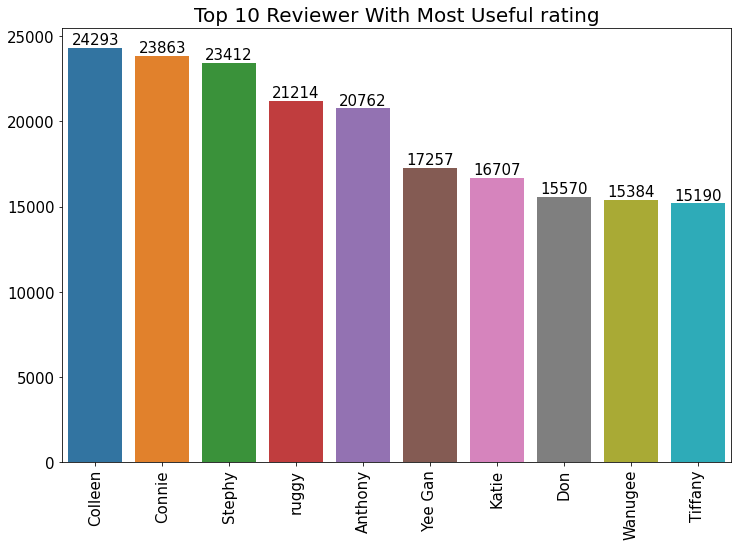

In [177]:
bar_plot(x = 'reviewer_name', y = 'reviewer_useful', data = useful_df, title = 'Top 10 Reviewer With Most Useful rating')

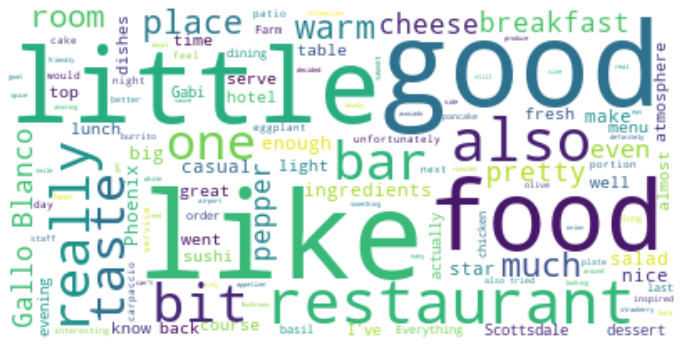

In [178]:
make_wordcloud(useful_df['text'])

# Reviewer Cool, Funny and Useful

From reviewer cool, funny and useful I found that the same person tend to get many rate for every review, so there might be a correlation between these three columns.

In [179]:
review[['reviewer_cool', 'reviewer_funny', 'reviewer_useful']]

,reviewer_cool,reviewer_funny,reviewer_useful
0,322,331,1034
1,0,2,0
2,0,0,3
3,1121,743,1584
4,1200,1187,1376
...,...,...,...
158419,377,494,622
158420,0,1,10
158421,161,56,231
158423,1,2,2


In [180]:
review[['reviewer_cool', 'reviewer_funny', 'reviewer_useful']].corr()

,reviewer_cool,reviewer_funny,reviewer_useful
reviewer_cool,1.000000,0.960000,0.992265
reviewer_funny,0.960000,1.000000,0.943716
reviewer_useful,0.992265,0.943716,1.000000


There are strong correlation between these three columns.

In [181]:
def scatter_plot(x, y, data, title):
    plt.figure(figsize = (12,8))
    sns.scatterplot(x = x, y = y, data = data)
    plt.xlabel(f'{x}', fontsize = 15)
    plt.ylabel(f'{y}', fontsize = 15)
    plt.title(title, fontsize = 20);

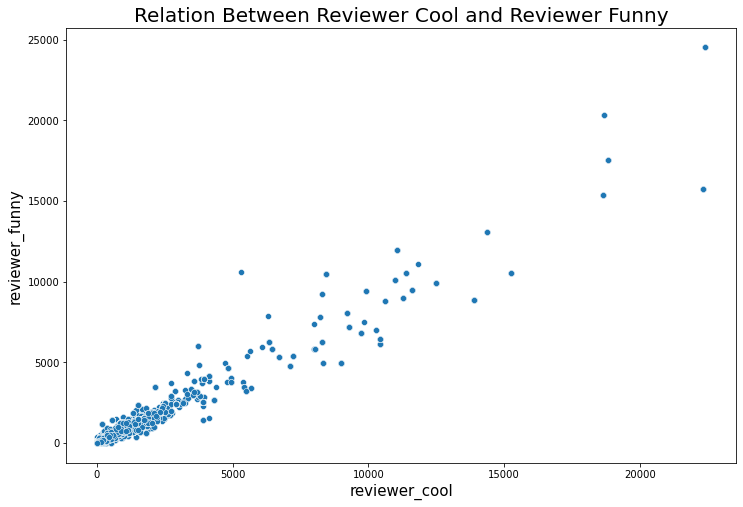

In [182]:
scatter_plot(x = 'reviewer_cool', y = 'reviewer_funny', data = review, title = 'Relation Between Reviewer Cool and Reviewer Funny')

From the graph we can see that reviewer cool and reviewer funny are having a positive correlation, which means that when one unit increase in cool vote for reviewer it tends to increase in funny vote for reviewer too.

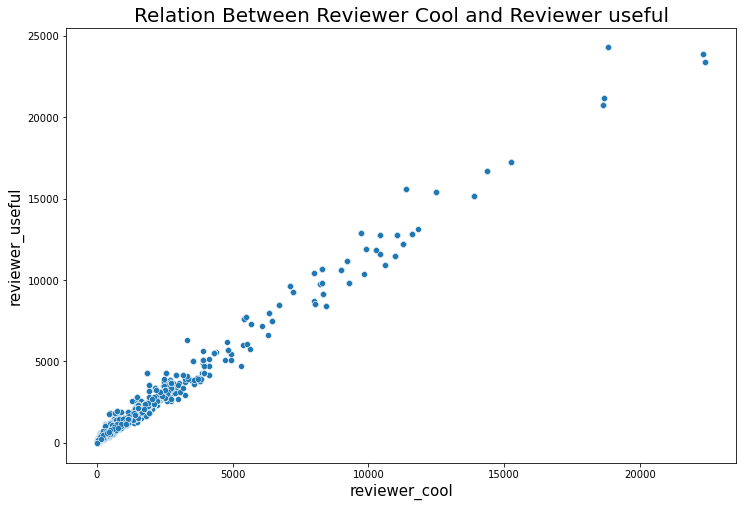

In [183]:
scatter_plot(x = 'reviewer_cool', y = 'reviewer_useful', data = review, title = 'Relation Between Reviewer Cool and Reviewer useful')

From the graph we can see that reviewer cool and reviewer useful are having a positive correlation, which means that when one unit increase in cool vote for reviewer it tends to increase in useful vote for reviewer too.

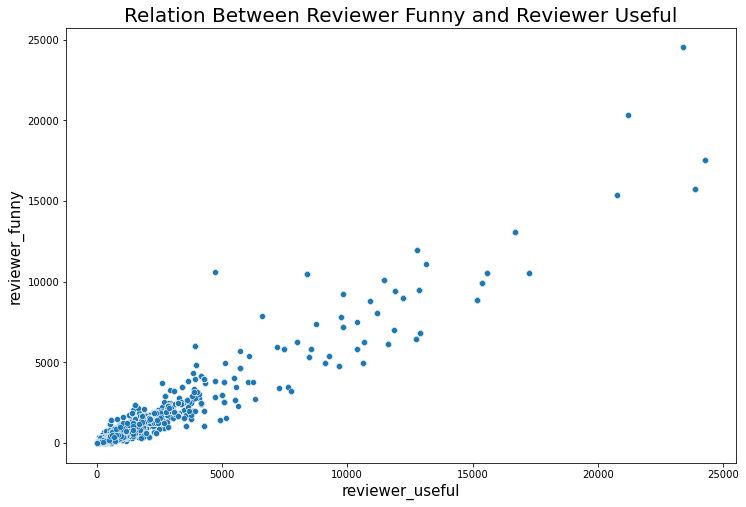

In [184]:
scatter_plot(x = 'reviewer_useful', y = 'reviewer_funny', data = review, title = 'Relation Between Reviewer Funny and Reviewer Useful')

From the graph we can see that reviewer useful and reviewer funny are having a positive correlation, which means that when one unit increase in useful vote for reviewer it tends to increase in funny vote for reviewer too.

# Reviewer Average Stars

In [185]:
review[['reviewer_name', 'stars', 'reviewer_average_stars']]

,reviewer_name,stars,reviewer_average_stars
0,Jason,5,3.72
1,Paul,5,5.00
2,Nicole,4,4.33
3,Deborah,4,3.54
4,Monique,5,3.79
...,...,...,...
158419,Megan,2,3.50
158420,Pam,2,3.50
158421,Tim,1,3.89
158423,Amanda,4,4.25


In [186]:
review['reviewer_average_stars'].value_counts()

4.00    6249
5.00    4353
3.00    2601
3.67    2513
3.50    2231
        ... 
4.96       1
1.36       1
1.82       1
1.61       1
1.79       1
Name: reviewer_average_stars, Length: 320, dtype: int64

In [187]:
review[['reviewer_average_stars', 'reviewer_cool', 'reviewer_funny', 'reviewer_useful']].head()

,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_useful
0,3.72,322,331,1034
1,5.00,0,2,0
2,4.33,0,0,3
3,3.54,1121,743,1584
4,3.79,1200,1187,1376


 We can see that even the reviewer average star is high it doen't mean that the reviwer will get high rating on cool, funny and useful. In the other hand, reviewer that get higher score on cool, funny and useful didn't get high on average stars either.

In [188]:
# There are no relation between reviewer average star and other columns
review[['reviewer_average_stars', 'reviewer_cool', 'reviewer_funny', 'reviewer_useful']].corr()

,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_useful
reviewer_average_stars,1.000000,0.004175,-0.007796,-0.004570
reviewer_cool,0.004175,1.000000,0.960000,0.992265
reviewer_funny,-0.007796,0.960000,1.000000,0.943716
reviewer_useful,-0.004570,0.992265,0.943716,1.000000


In [189]:
review.columns

Index(['business_categories', 'business_city', 'business_id',
       'business_latitude', 'business_longitude', 'business_name',
       'business_open', 'business_review_count', 'business_stars',
       'business_state', 'cool', 'date', 'funny', 'review_id',
       'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool',
       'reviewer_funny', 'reviewer_name', 'reviewer_review_count',
       'reviewer_useful', 'stars', 'text', 'useful', 'user_id', 'categories'],
      dtype='object')

In [190]:
# Drop columns that I will not use in this dataset
col_to_drop = ['business_open', 'business_state', 'cool', 'funny', 'reviewer_blank', 'useful']
review = review.drop(columns = col_to_drop)

In [191]:
review.head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_review_count,business_stars,date,review_id,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,user_id,categories
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,116,4.0,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,3.72,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,"[Breakfast & Brunch, Restaurants]"
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,102,4.0,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5.00,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,"[Italian, Pizza, Restaurants]"
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,265,4.5,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4.33,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,"[Middle Eastern, Restaurants]"
3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,109,3.5,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,3.54,1121,743,Deborah,654,1584,4,"Quiessence is, simply put, beautiful. Full wi...",sqYN3lNgvPbPCTRsMFu27g,"[Wine Bars, Bars, American (New), Nightlife..."
4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,307,4.0,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,3.79,1200,1187,Monique,295,1376,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,"[Mexican, Restaurants]"


In [192]:
# Reset index in case that index is not match after we drop and select some rows
review = review.reset_index()

In [193]:
review.head()

,index,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_review_count,business_stars,date,...,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,user_id,categories
0,0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,116,4.0,2011-01-26,...,3.72,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,"[Breakfast & Brunch, Restaurants]"
1,1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,102,4.0,2011-07-27,...,5.00,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,"[Italian, Pizza, Restaurants]"
2,2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,265,4.5,2012-06-14,...,4.33,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,"[Middle Eastern, Restaurants]"
3,3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,109,3.5,2007-12-13,...,3.54,1121,743,Deborah,654,1584,4,"Quiessence is, simply put, beautiful. Full wi...",sqYN3lNgvPbPCTRsMFu27g,"[Wine Bars, Bars, American (New), Nightlife..."
4,4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,307,4.0,2010-02-12,...,3.79,1200,1187,Monique,295,1376,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,"[Mexican, Restaurants]"


In [194]:
review = review.drop(columns = ['index'])
review.head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_review_count,business_stars,date,review_id,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,user_id,categories
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,116,4.0,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,3.72,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,"[Breakfast & Brunch, Restaurants]"
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,102,4.0,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5.00,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,"[Italian, Pizza, Restaurants]"
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,265,4.5,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4.33,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,"[Middle Eastern, Restaurants]"
3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,109,3.5,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,3.54,1121,743,Deborah,654,1584,4,"Quiessence is, simply put, beautiful. Full wi...",sqYN3lNgvPbPCTRsMFu27g,"[Wine Bars, Bars, American (New), Nightlife..."
4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,307,4.0,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,3.79,1200,1187,Monique,295,1376,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,"[Mexican, Restaurants]"


In [195]:
review.shape

(135587, 20)

# Text

-  Text columns is the review text that each user review on each restaurants

In [196]:
review['text'].isnull().sum()

2

In [197]:
review = drop_null(review, 'text')
review.head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_review_count,business_stars,date,review_id,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,user_id,categories
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,116,4.0,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,3.72,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,"[Breakfast & Brunch, Restaurants]"
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,102,4.0,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5.00,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,"[Italian, Pizza, Restaurants]"
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,265,4.5,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4.33,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,"[Middle Eastern, Restaurants]"
3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,109,3.5,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,3.54,1121,743,Deborah,654,1584,4,"Quiessence is, simply put, beautiful. Full wi...",sqYN3lNgvPbPCTRsMFu27g,"[Wine Bars, Bars, American (New), Nightlife..."
4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,307,4.0,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,3.79,1200,1187,Monique,295,1376,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,"[Mexican, Restaurants]"


In [198]:
review = review.reset_index()
review = review.drop(columns = ['index'])

In [199]:
review.head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_review_count,business_stars,date,review_id,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,user_id,categories
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,116,4.0,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,3.72,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,"[Breakfast & Brunch, Restaurants]"
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,102,4.0,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5.00,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,"[Italian, Pizza, Restaurants]"
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,265,4.5,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4.33,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,"[Middle Eastern, Restaurants]"
3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,109,3.5,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,3.54,1121,743,Deborah,654,1584,4,"Quiessence is, simply put, beautiful. Full wi...",sqYN3lNgvPbPCTRsMFu27g,"[Wine Bars, Bars, American (New), Nightlife..."
4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,307,4.0,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,3.79,1200,1187,Monique,295,1376,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,"[Mexican, Restaurants]"


In [200]:
review[review['text'].isnull() == True]

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_review_count,business_stars,date,review_id,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,user_id,categories


In [201]:
review.isnull().sum()

business_categories       0
business_city             0
business_id               0
business_latitude         0
business_longitude        0
business_name             0
business_review_count     0
business_stars            0
date                      0
review_id                 0
reviewer_average_stars    0
reviewer_cool             0
reviewer_funny            0
reviewer_name             0
reviewer_review_count     0
reviewer_useful           0
stars                     0
text                      0
user_id                   0
categories                0
dtype: int64

In [202]:
review['text']

0         My wife took me here on my birthday for breakf...
1         I have no idea why some people give bad review...
2         love the gyro plate. Rice is so good and I als...
3         Quiessence is, simply put, beautiful.  Full wi...
4         Drop what you're doing and drive here. After I...
                                ...                        
135580    No, we just stopped serving breakfast.\nThe on...
135581    I have been wanting to try Cowboy Ciao for a w...
135582    The coffee was good.\nI had the two egg breakf...
135583    Cool atmosphere. A lot of beers on tap and goo...
135584    I have to take a star off for the spotty servi...
Name: text, Length: 135585, dtype: object

In [203]:
review['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

## Clean Text

In [204]:
import re
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [205]:
# Create function to clean text
def clean_text(raw_text):
    # Remove non letter
    letters_only = re.sub('[^a-zA-z]', ' ', raw_text) # Remove special character
    letters_only = re.sub('[^\w]', ' ', letters_only)
    letters_only = letters_only.lower().split()

    # Remove Stop words
    stops = set(stopwords.words('english')) # Remove stopwords
    meaningful_word = [word for word in letters_only if word not in stops]

    # Stemming
    stem = PorterStemmer()
    stem_word = [stem.stem(word) for word in meaningful_word]
    new_word = ' '.join(stem_word)

    return new_word

In [206]:
# Try with
clean_text(review['text'][0])

'wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semi busi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ever pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came piec griddl bread amaz absolut made meal complet best toast ever anyway wait go back'

In [207]:
for i in range(review.shape[0]):
    review['text'][i] = clean_text(review['text'][i])

<ipython-input-207-1ebacd337977>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['text'][i] = clean_text(review['text'][i])


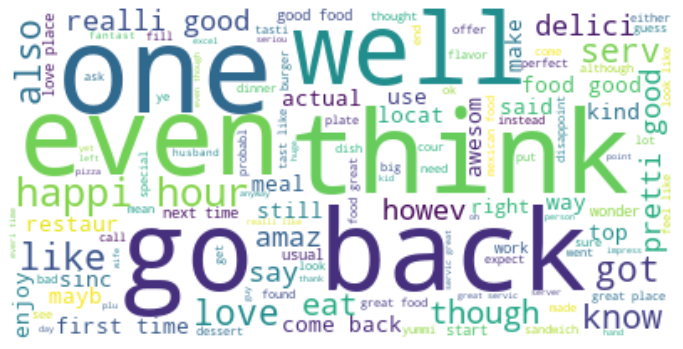

In [208]:
make_wordcloud(review['text'])

In [136]:
review.isnull().sum()

business_categories       0
business_city             0
business_id               0
business_latitude         0
business_longitude        0
business_name             0
business_review_count     0
business_stars            0
date                      0
review_id                 0
reviewer_average_stars    0
reviewer_cool             0
reviewer_funny            0
reviewer_name             0
reviewer_review_count     0
reviewer_useful           0
stars                     0
text                      0
user_id                   0
categories                0
all_text                  0
dtype: int64

In [137]:
review.head()

,business_categories,business_city,business_id,business_latitude,business_longitude,business_name,business_review_count,business_stars,date,review_id,...,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,user_id,categories,all_text
0,Breakfast & Brunch; Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,116,4.0,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,...,322,331,Jason,376,1034,5,wife took birthday breakfast excel weather per...,rLtl8ZkDX5vH5nAx9C3q5Q,"Breakfast & Brunch, Restaurants",breakfast brunch restaur wife took birthday br...
1,Italian; Pizza; Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,102,4.0,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,...,0,2,Paul,2,0,5,idea peopl give bad review place goe show plea...,0a2KyEL0d3Yb1V6aivbIuQ,"Italian, Pizza, Restaurants",italian pizza restaur idea peopl give bad revi...
2,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,265,4.5,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,...,0,0,Nicole,3,3,4,love gyro plate rice good also dig candi select,0hT2KtfLiobPvh6cDC8JQg,"Middle Eastern, Restaurants",middl eastern restaur love gyro plate rice goo...
3,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,109,3.5,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,...,1121,743,Deborah,654,1584,4,quiessenc simpli put beauti full window earthi...,sqYN3lNgvPbPCTRsMFu27g,"Wine Bars, Bars, American (New), Nightlife, Re...",wine bar bar american new nightlif restaur qui...
4,Mexican; Restaurants,Phoenix,zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,307,4.0,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,...,1200,1187,Monique,295,1376,5,drop drive ate go back next day food good cute...,wFweIWhv2fREZV_dYkz_1g,"Mexican, Restaurants",mexican restaur drop drive ate go back next da...


In [138]:
review.to_csv('yelp_cleaned.csv', index = False)